In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

df=pd.read_csv("/content/Copy of AirQualityUCI.csv",index_col=0,parse_dates=[['Date', 'Time']])
df=df.iloc[:,:15]
df=df.drop(["PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)","PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","RH","AH","Unnamed: 15"],axis=1)
df=df.head(9357)
df=df.iloc[:400,:2]
df.iloc[173:197]


,CO(GT),T
Date_Time,,
17-03-2004 23:00:00,2.6,16.0
18-03-2004 00:00:00,2.3,14.8
18-03-2004 01:00:00,1.4,14.3
18-03-2004 02:00:00,1.0,14.8
18-03-2004 03:00:00,0.7,13.9
18-03-2004 04:00:00,-200.0,11.6
18-03-2004 05:00:00,0.6,12.0
18-03-2004 06:00:00,0.7,10.9
18-03-2004 07:00:00,1.5,10.6


In [ ]:
df.isna().sum()

CO(GT)    0
T         0
dtype: int64

In [ ]:
df.index = pd.to_datetime(df.index , format = '%d-%m-%Y %H:%M:%S')
data = df

In [ ]:
data1=data.iloc[:,:1]
data1

,CO(GT)
Date_Time,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6
...,...
2004-03-27 05:00:00,0.8
2004-03-27 06:00:00,0.9
2004-03-27 07:00:00,1.1


In [ ]:
data.head(350)

,CO(GT),T
Date_Time,,
2004-03-10 18:00:00,2.6,13.6
2004-03-10 19:00:00,2.0,13.3
2004-03-10 20:00:00,2.2,11.9
2004-03-10 21:00:00,2.2,11.0
2004-03-10 22:00:00,1.6,11.2
...,...,...
2004-03-25 03:00:00,0.7,9.5
2004-03-25 04:00:00,0.5,9.3
2004-03-25 05:00:00,0.5,9.9


In [ ]:
data2=data.drop(["CO(GT)"] ,axis=1)
data2

,T
Date_Time,
2004-03-10 18:00:00,13.6
2004-03-10 19:00:00,13.3
2004-03-10 20:00:00,11.9
2004-03-10 21:00:00,11.0
2004-03-10 22:00:00,11.2
...,...
2004-03-27 05:00:00,8.2
2004-03-27 06:00:00,6.3
2004-03-27 07:00:00,7.2


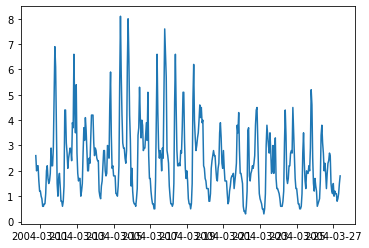

In [ ]:
#missing value treatment
cols1 = data1.columns
for j in cols1:
    for i in range(0,len(data1)):
       if data1[j][i] == -200:
           data1[j][i] = data1[j][i-1]

#checking stationarity
plt.plot(data1);


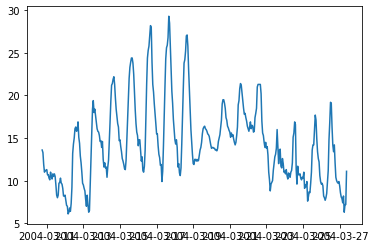

In [ ]:
#missing value treatment
cols2 = data2.columns
for j in cols2:
    for i in range(0,len(data2)):
       if data2[j][i] == -200:
           data2[j][i] = data2[j][i-1]

#checking stationarity
plt.plot(data2);

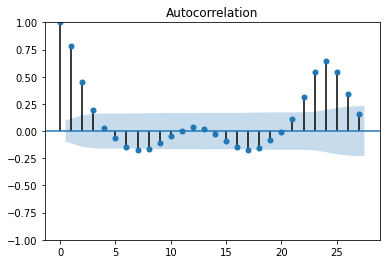

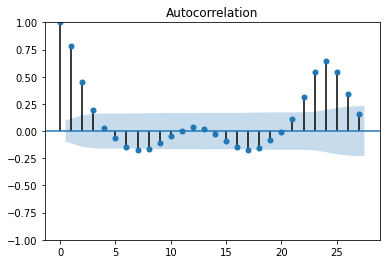

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1)

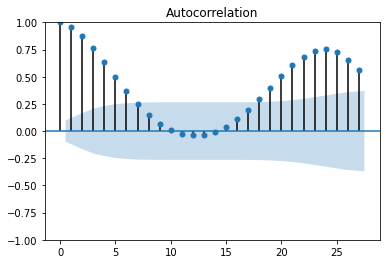

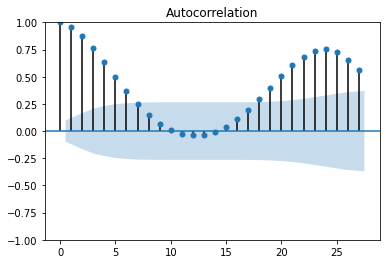

In [ ]:
plot_acf(data2)

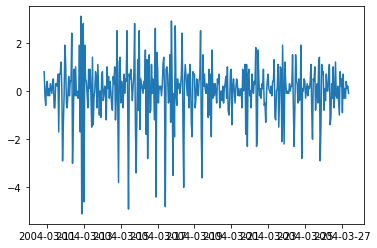

In [ ]:

#data1 = np.sqrt(data1)-np.sqrt(data1).shift(1)
data1=data1-data1.shift(1)
data1=data1-data1.shift(1)
#data1 = data1.rolling(1).mean()

data1=data1.dropna()
plt.plot(data1)

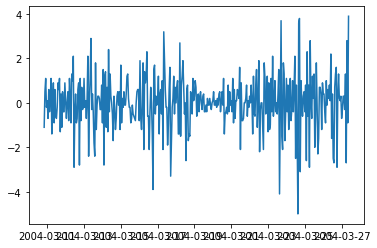

In [ ]:
#data2=data2-data2.shift(1)
#data2 = data2.rolling(1).mean()
data2 = data2-data2.shift(1)
data2 = data2-data2.shift(1)
#data2 = np.sqrt(data2)

data2=data2.dropna()
plt.plot(data2)

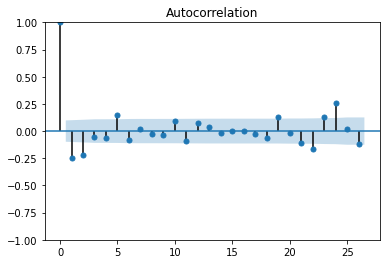

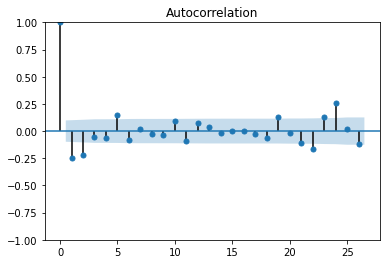

In [ ]:
plot_acf(data1)

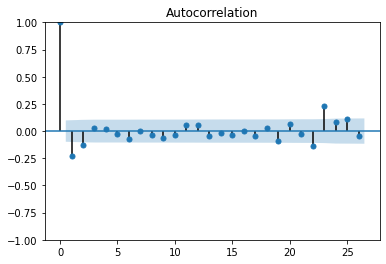

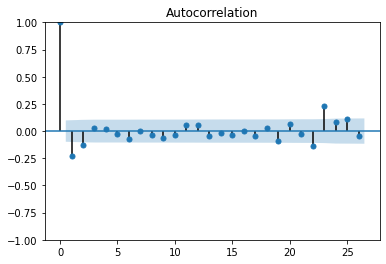

In [ ]:
plot_acf(data2)

In [ ]:
data1=data1.dropna()
data2=data2.dropna()

In [ ]:
#pip uninstall statsmodels

In [ ]:
#pip install statsmodels

In [ ]:
#pip install pmdarima

In [ ]:
from pmdarima import auto_arima
stepwise_fit1 = auto_arima(data1, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1046.535, Time=1.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1267.025, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1244.057, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1265.027, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.93 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 10.072 seconds


In [ ]:
from pmdarima import auto_arima
stepwise_fit2 = auto_arima(data2, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1290.733, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1269.919, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1258.374, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1288.763, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1252.318, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1250.362, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1256.417, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(

In [ ]:
data.iloc[173:197]

,CO(GT),T
Date_Time,,
2004-03-17 23:00:00,2.6,16.0
2004-03-18 00:00:00,2.3,14.8
2004-03-18 01:00:00,1.4,14.3
2004-03-18 02:00:00,1.0,14.8
2004-03-18 03:00:00,0.7,13.9
2004-03-18 04:00:00,0.7,11.6
2004-03-18 05:00:00,0.6,12.0
2004-03-18 06:00:00,0.7,10.9
2004-03-18 07:00:00,1.5,10.6


In [ ]:
data.iloc[5:173,:]

,CO(GT),T
Date_Time,,
2004-03-10 23:00:00,1.2,11.2
2004-03-11 00:00:00,1.2,11.3
2004-03-11 01:00:00,1.0,10.7
2004-03-11 02:00:00,0.9,10.7
2004-03-11 03:00:00,0.6,10.3
...,...,...
2004-03-17 18:00:00,5.0,25.9
2004-03-17 19:00:00,7.6,23.1
2004-03-17 20:00:00,6.7,20.5


In [ ]:
ddata1=data.iloc[:,:1]

In [ ]:
ddata2=data.drop(['CO(GT)'],axis=1)

In [ ]:
ddata1


,CO(GT)
Date_Time,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6
...,...
2004-03-27 05:00:00,0.8
2004-03-27 06:00:00,0.9
2004-03-27 07:00:00,1.1


In [ ]:
ddata2

,T
Date_Time,
2004-03-10 18:00:00,13.6
2004-03-10 19:00:00,13.3
2004-03-10 20:00:00,11.9
2004-03-10 21:00:00,11.0
2004-03-10 22:00:00,11.2
...,...
2004-03-27 05:00:00,8.2
2004-03-27 06:00:00,6.3
2004-03-27 07:00:00,7.2


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
import warnings


In [ ]:
def mean_absolute_percentage_erro(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
data2.head(23)

,T
Date_Time,
2004-03-10 20:00:00,-1.1
2004-03-10 21:00:00,0.5
2004-03-10 22:00:00,1.1
2004-03-10 23:00:00,-0.2
2004-03-11 00:00:00,0.1
2004-03-11 01:00:00,-0.7
2004-03-11 02:00:00,0.6
2004-03-11 03:00:00,-0.4
2004-03-11 04:00:00,0.2


In [ ]:
data1

,CO(GT)
Date_Time,
2004-03-10 20:00:00,0.8
2004-03-10 21:00:00,-0.2
2004-03-10 22:00:00,-0.6
2004-03-10 23:00:00,0.2
2004-03-11 00:00:00,0.4
...,...
2004-03-27 05:00:00,-0.3
2004-03-27 06:00:00,0.4
2004-03-27 07:00:00,0.1


In [ ]:
data1.iloc[4:173,:]

,CO(GT)
Date_Time,
2004-03-11 00:00:00,0.4
2004-03-11 01:00:00,-0.2
2004-03-11 02:00:00,0.1
2004-03-11 03:00:00,-0.2
2004-03-11 04:00:00,0.3
...,...
2004-03-17 20:00:00,-3.5
2004-03-17 21:00:00,-0.1
2004-03-17 22:00:00,-1.9


In [ ]:
data1=data1+8
data2=data2+30

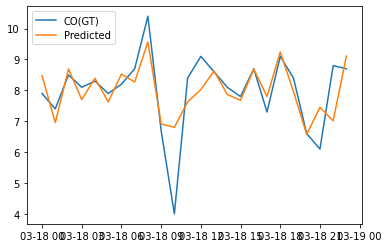

MAPE: for CO(GT) for 8 th day 15.709504652705602


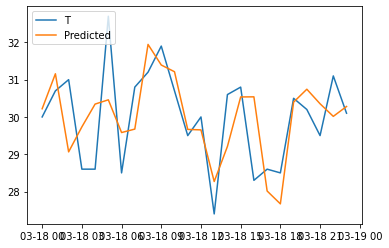

MAPE: for T for 8 th day 4.357380858494073


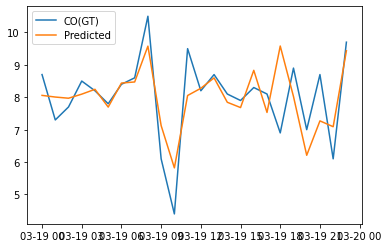

MAPE: for CO(GT) for 9 th day 16.221211710919636


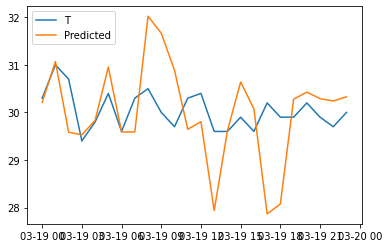

MAPE: for T for 9 th day 2.7014138299338177


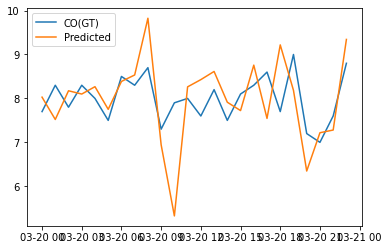

MAPE: for CO(GT) for 10 th day 10.323709867469463


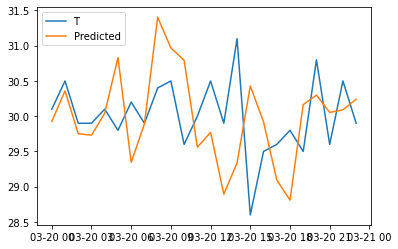

MAPE: for T for 10 th day 2.12775164235344


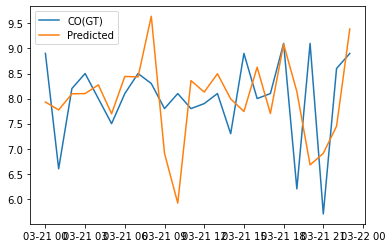

MAPE: for CO(GT) for 11 th day 11.92208846443606


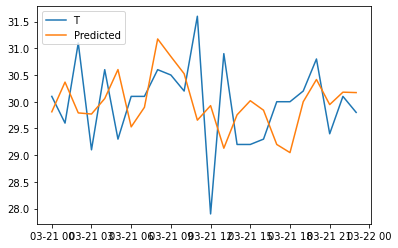

MAPE: for T for 11 th day 2.4199587813642394


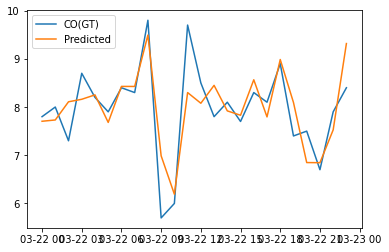

MAPE: for CO(GT) for 12 th day 11.999562645175711


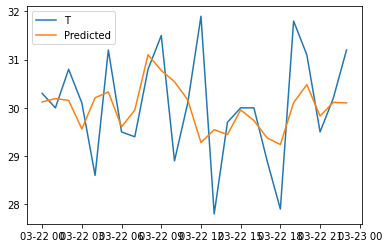

MAPE: for T for 12 th day 3.2155030292477225


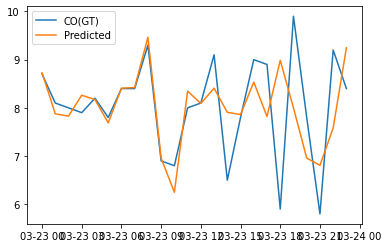

MAPE: for CO(GT) for 13 th day 12.985020039865159


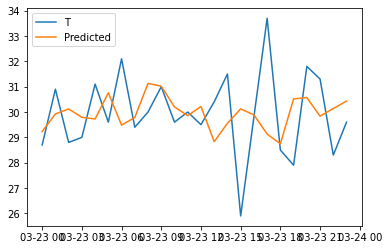

MAPE: for T for 13 th day 4.417321030096658


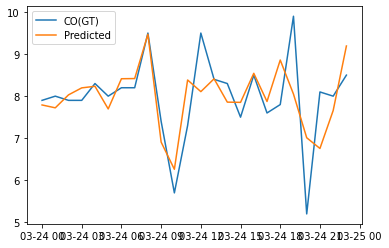

MAPE: for CO(GT) for 14 th day 12.201874992034092


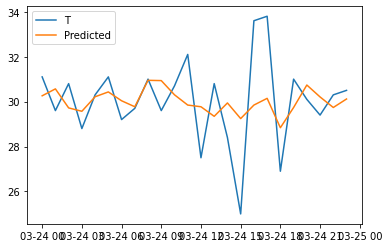

MAPE: for T for 14 th day 4.8626282735269655


In [ ]:
warnings.filterwarnings("ignore")
array1=[]
array2=[]
x=172
y=196
for i in range(7):
  train1=data1.iloc[4:x,:]
  test1=data1.iloc[x:y,:]
  train2=data2.iloc[4:x,:]
  test2=data2.iloc[x:y,:]
  model1=ARIMA(train1,order=(2,0,2),seasonal_order=(1,1,1,24))
  model1=model1.fit()
  model2=ARIMA(train2,order=(0,0,2),seasonal_order=(1,1,1,24))
  model2=model2.fit()
  start1=len(train1)
  end1=len(train1)+len(test1)-1
  pred1=model1.predict(start=start1,end=end1,typ='levels').rename('ARIMA Predictions')
  plt.plot(test1,label="CO(GT)")
  plt.plot(pred1,label="Predicted")
  plt.legend(loc="upper left")
  plt.show()
  print("MAPE: for CO(GT) for",8+i,"th day",mean_absolute_percentage_erro(test1,pred1))
  array1.append(mean_absolute_percentage_erro(test1,pred1))
  start2=len(train2)
  end2=len(train2)+len(test2)-1
  pred2=model2.predict(start=start2,end=end2,typ='levels').rename('ARIMA Predictions')
  plt.plot(test2,label="T")
  plt.plot(pred2,label="Predicted")
  plt.legend(loc="upper left")
  plt.show()
  print("MAPE: for T for",8+i,"th day",mean_absolute_percentage_erro(test2,pred2))
  array2.append(mean_absolute_percentage_erro(test2,pred2))
  x+=24
  y+=24



In [ ]:
print("Average MAPE for CO(GT) is",sum(array1)/len(array1))

Average MAPE for CO(GT) is 13.051853196086531


In [ ]:
print("Average MAPE for T is",sum(array2)/len(array2))

Average MAPE for T is 3.4431367778595594


In [ ]:
pred1

2004-03-24 00:00:00    7.790543
2004-03-24 01:00:00    7.722460
2004-03-24 02:00:00    8.030640
2004-03-24 03:00:00    8.196943
2004-03-24 04:00:00    8.234358
2004-03-24 05:00:00    7.696383
2004-03-24 06:00:00    8.414129
2004-03-24 07:00:00    8.418225
2004-03-24 08:00:00    9.471835
2004-03-24 09:00:00    6.907312
2004-03-24 10:00:00    6.261074
2004-03-24 11:00:00    8.384416
2004-03-24 12:00:00    8.107479
2004-03-24 13:00:00    8.412463
2004-03-24 14:00:00    7.857856
2004-03-24 15:00:00    7.852439
2004-03-24 16:00:00    8.543312
2004-03-24 17:00:00    7.873088
2004-03-24 18:00:00    8.859063
2004-03-24 19:00:00    8.049863
2004-03-24 20:00:00    7.010861
2004-03-24 21:00:00    6.756450
2004-03-24 22:00:00    7.658177
2004-03-24 23:00:00    9.192973
Freq: H, Name: ARIMA Predictions, dtype: float64

In [ ]:
pred2

2004-03-24 00:00:00    30.258590
2004-03-24 01:00:00    30.566260
2004-03-24 02:00:00    29.719490
2004-03-24 03:00:00    29.569335
2004-03-24 04:00:00    30.215995
2004-03-24 05:00:00    30.431056
2004-03-24 06:00:00    30.037434
2004-03-24 07:00:00    29.770915
2004-03-24 08:00:00    30.947736
2004-03-24 09:00:00    30.935235
2004-03-24 10:00:00    30.302144
2004-03-24 11:00:00    29.845808
2004-03-24 12:00:00    29.770456
2004-03-24 13:00:00    29.344669
2004-03-24 14:00:00    29.940109
2004-03-24 15:00:00    29.243907
2004-03-24 16:00:00    29.845347
2004-03-24 17:00:00    30.145115
2004-03-24 18:00:00    28.836895
2004-03-24 19:00:00    29.736964
2004-03-24 20:00:00    30.738002
2004-03-24 21:00:00    30.207121
2004-03-24 22:00:00    29.738293
2004-03-24 23:00:00    30.116326
Freq: H, Name: ARIMA Predictions, dtype: float64

In [ ]:
array1

[15.709504652705602,
 16.221211710919636,
 10.323709867469463,
 11.92208846443606,
 11.999562645175711,
 12.985020039865159,
 12.201874992034092]

In [ ]:
array2


[4.357380858494073,
 2.7014138299338177,
 2.12775164235344,
 2.4199587813642394,
 3.2155030292477225,
 4.417321030096658,
 4.8626282735269655]

In [ ]:
data1.head(335)

,CO(GT)
Date_Time,
2004-03-10 20:00:00,8.8
2004-03-10 21:00:00,7.8
2004-03-10 22:00:00,7.4
2004-03-10 23:00:00,8.2
2004-03-11 00:00:00,8.4
...,...
2004-03-24 14:00:00,8.3
2004-03-24 15:00:00,7.5
2004-03-24 16:00:00,8.5
